## Explore Squad v1.1

In [1]:
import os
import sys
sys.path.append(os.path.abspath('.'))
sys.path.append(os.path.abspath(r'./.'))

In [2]:
%pwd

'/home/borela/fontes/exqa-complearning/source/data_related'

In [3]:
%cd ../..

/home/borela/fontes/exqa-complearning


In [4]:
import pandas as pd

In [5]:
from source.data_related import squad_related

/home/borela/miniconda3/envs/exqa-complearning/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import importlib
importlib.reload(squad_related)

<module 'source.data_related.squad_related' from '/home/borela/fontes/exqa-complearning/source/data_related/squad_related.py'>

In [7]:
vdataset =squad_related.load_squad_dataset_1_1('en')

Using custom data configuration default-d2cdb99fa46933e9
Reusing dataset json (/home/borela/.cache/huggingface/datasets/json/default-d2cdb99fa46933e9/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5)
100%|██████████| 1/1 [00:00<00:00, 639.67it/s]


In [8]:
vdataset.dataset[0]

{'id': '56be4db0acb8001400a502ec',
 'title': 'Super_Bowl_50',
 'context': 'Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi\'s Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.',
 'question': 'Which NFL team represented the AFC at Super Bowl 50?',
 'answer_start': [177, 177, 177],
 'answer_text': ['Denver Broncos', 'Denver 

In [9]:
df = vdataset.df

In [10]:
len(df)

10570

In [11]:
df.head(2)

,id,title,context,question,answer_start,answer_text,question_len_char,context_len_char,question_context_len_char
0,56be4db0acb8001400a502ec,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team represented the AFC at Super Bo...,"[177, 177, 177]","[Denver Broncos, Denver Broncos, Denver Broncos]",52,775,827
1,56be4db0acb8001400a502ed,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team represented the NFC at Super Bo...,"[249, 249, 249]","[Carolina Panthers, Carolina Panthers, Carolin...",52,775,827


In [12]:
from source.data_related import rastro_evaluation_qa


In [15]:
rastro_eval_qa = rastro_evaluation_qa.RastroEvaluationQa()


In [16]:
rastro_eval_qa.df_evaluation.head(2)

,cod,name_learning_method,ind_language,name_model,name_device,descr_filter,num_question,datetime_execution,time_execution_total,time_execution_per_question,num_top_k,num_factor_multiply_top_k,num_max_answer_length,num_doc_stride,if_handle_impossible_answer,if_do_sample,val_length_penalty,val_temperature,cod_prompt_format,list_stop_words
0,14,transfer,pt,pierreguillou/bert-large-cased-squad-v1.1-port...,cuda:0,{},10570,2022-07-17 21:54:25,2632,249,3,10.0,80,128.0,0.0,NaN,NaN,NaN,NaN,NaN
1,15,transfer,en,distilbert-base-cased-distilled-squad,cuda:0,{},10570,2022-07-17 22:40:21,2329,220,3,10.0,80,128.0,0.0,NaN,NaN,NaN,NaN,NaN


In [17]:
rastro_eval_qa.df_calculated_metric.head(2)

,cod_evaluation,cod_metric,value
0,14,EM,72.20
1,14,F1,83.17


In [18]:
df_eval = pd.merge(left=rastro_eval_qa.df_evaluation, right=rastro_eval_qa.df_calculated_metric , left_on='cod', right_on='cod_evaluation', how='left')

In [19]:
len(df_eval)

92

In [20]:
df_eval.head(5)

,cod,name_learning_method,ind_language,name_model,name_device,descr_filter,num_question,datetime_execution,time_execution_total,time_execution_per_question,...,num_doc_stride,if_handle_impossible_answer,if_do_sample,val_length_penalty,val_temperature,cod_prompt_format,list_stop_words,cod_evaluation,cod_metric,value
0,14,transfer,pt,pierreguillou/bert-large-cased-squad-v1.1-port...,cuda:0,{},10570,2022-07-17 21:54:25,2632,249,...,128.0,0.0,NaN,NaN,NaN,NaN,NaN,14,EM,72.20
1,14,transfer,pt,pierreguillou/bert-large-cased-squad-v1.1-port...,cuda:0,{},10570,2022-07-17 21:54:25,2632,249,...,128.0,0.0,NaN,NaN,NaN,NaN,NaN,14,F1,83.17
2,14,transfer,pt,pierreguillou/bert-large-cased-squad-v1.1-port...,cuda:0,{},10570,2022-07-17 21:54:25,2632,249,...,128.0,0.0,NaN,NaN,NaN,NaN,NaN,14,EM@3,84.55
3,14,transfer,pt,pierreguillou/bert-large-cased-squad-v1.1-port...,cuda:0,{},10570,2022-07-17 21:54:25,2632,249,...,128.0,0.0,NaN,NaN,NaN,NaN,NaN,14,F1@3,89.74
4,15,transfer,en,distilbert-base-cased-distilled-squad,cuda:0,{},10570,2022-07-17 22:40:21,2329,220,...,128.0,0.0,NaN,NaN,NaN,NaN,NaN,15,EM,78.34


In [21]:
df_eval_grouped = df_eval.pivot(index='cod', columns='cod_metric', values='value')

In [26]:
len(df_eval_grouped)

23

In [27]:
df_eval_grouped.head(5)

,cod,name_learning_method,ind_language,name_model,name_device,descr_filter,num_question,datetime_execution,time_execution_total,time_execution_per_question,...,if_handle_impossible_answer,if_do_sample,val_length_penalty,val_temperature,cod_prompt_format,list_stop_words,EM,EM@3,F1,F1@3
0,14,transfer,pt,pierreguillou/bert-large-cased-squad-v1.1-port...,cuda:0,{},10570,2022-07-17 21:54:25,2632,249,...,0.0,NaN,NaN,NaN,NaN,NaN,72.20,84.55,83.17,89.74
1,15,transfer,en,distilbert-base-cased-distilled-squad,cuda:0,{},10570,2022-07-17 22:40:21,2329,220,...,0.0,NaN,NaN,NaN,NaN,NaN,78.34,88.00,85.94,91.98
2,16,transfer,pt,pierreguillou/bert-large-cased-squad-v1.1-port...,cuda:0,{},10570,2022-07-17 23:21:29,2922,276,...,0.0,NaN,NaN,NaN,NaN,NaN,72.14,84.41,83.10,89.65
3,17,transfer,en,distilbert-base-cased-distilled-squad,cuda:0,{},10570,2022-07-18 00:12:43,2331,221,...,0.0,NaN,NaN,NaN,NaN,NaN,78.32,87.86,85.92,91.84
4,18,context,en,EleutherAI/gpt-j-6B,cuda:0,{},10570,2022-07-18 14:36:12,4937,467,...,NaN,0.0,0.0,0.1,101.0,"['.', '\n', '!']",30.96,36.38,39.49,47.89


In [24]:
df_pivoted_metric = rastro_eval_qa._df_calculated_metric.pivot(index='cod_evaluation', columns='cod_metric', values='value')


In [25]:
df_eval_grouped = pd.merge(left=rastro_eval_qa.df_evaluation, right=df_pivoted_metric , left_on='cod', right_on='cod_evaluation', how='left')



In [53]:
id_context_len='5726c3da708984140094d0db'

In [54]:
dtype_calculated_metric_per_question = {
    'cod_evaluation':int,
    'cod_question':str,
    'cod_metric':str,
    'value':float,
}
df_eval_per_question = pd.read_csv('data/tab_calculated_metric_per_question.csv', sep = ',',
        header=0,
        dtype= dtype_calculated_metric_per_question,
        index_col=False)
for property_name, property_type in dtype_calculated_metric_per_question.items():
    if property_type in (int, float, bool):
        df_eval_per_question[property_name] = df_eval_per_question[property_name].astype(property_type)

df_eval_per_question.head()

,cod_evaluation,cod_question,cod_metric,value
0,14,56be4db0acb8001400a502ec,EM,1.0
1,14,56be4db0acb8001400a502ec,F1,1.0
2,14,56be4db0acb8001400a502ec,EM@3,1.0
3,14,56be4db0acb8001400a502ec,F1@3,1.0
4,14,56be4db0acb8001400a502ed,EM,1.0


In [65]:
df_eval_per_question.query('cod_evaluation==29 and cod_metric=="F1"')[['value']].describe()

,value
count,10570.000000
mean,0.687339
std,0.411423
min,0.000000
25%,0.315800
50%,1.000000
75%,1.000000
max,1.000000


In [67]:
df_eval_per_question_qtd_char = pd.merge(left=df, right=df_eval_per_question , left_on='id', right_on='cod_question', how='left')[['cod_evaluation', 'cod_question', 'cod_metric', 'value','question_context_len_char' ]]

In [68]:
df_eval_per_question_qtd_char.head(5)

,cod_evaluation,cod_question,cod_metric,value,question_context_len_char
0,14,56be4db0acb8001400a502ec,EM,1.0,827
1,14,56be4db0acb8001400a502ec,F1,1.0,827
2,14,56be4db0acb8001400a502ec,EM@3,1.0,827
3,14,56be4db0acb8001400a502ec,F1@3,1.0,827
4,15,56be4db0acb8001400a502ec,EM,1.0,827


In [73]:
df_alvo = df_eval_per_question_qtd_char.query('cod_evaluation==29 and cod_metric=="F1"')

In [ ]:
df_alvo.plot(kind='bar',x='question_context_len_char', y='value')

<AxesSubplot:xlabel='question_context_len_char', ylabel='value'>

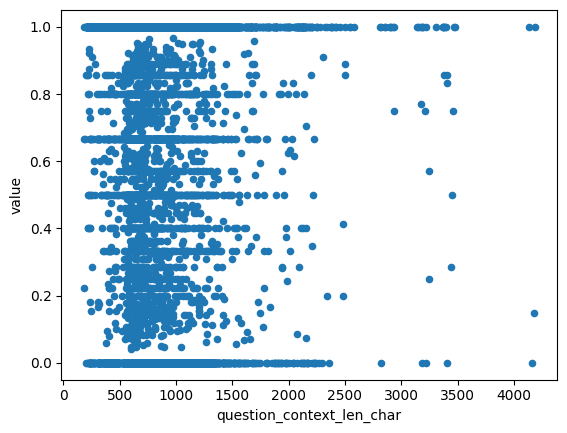

In [74]:
df_alvo.plot(kind='scatter',x='question_context_len_char', y='value')

<AxesSubplot:xlabel='question_context_len_char', ylabel='value'>

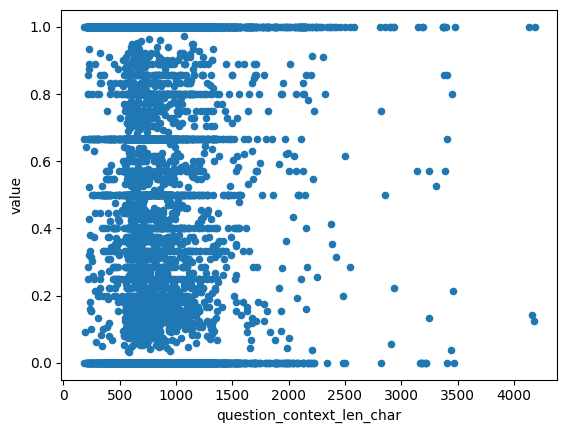

In [75]:
df_alvo = df_eval_per_question_qtd_char.query('cod_evaluation==26 and cod_metric=="F1"')
df_alvo.plot(kind='scatter',x='question_context_len_char', y='value')

<AxesSubplot:xlabel='question_context_len_char', ylabel='value'>

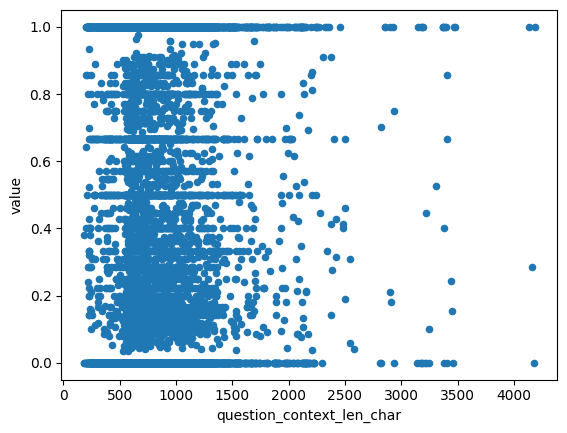

In [76]:
df_alvo = df_eval_per_question_qtd_char.query('cod_evaluation==22 and cod_metric=="F1"')
df_alvo.plot(kind='scatter',x='question_context_len_char', y='value')

<AxesSubplot:xlabel='question_context_len_char', ylabel='value'>

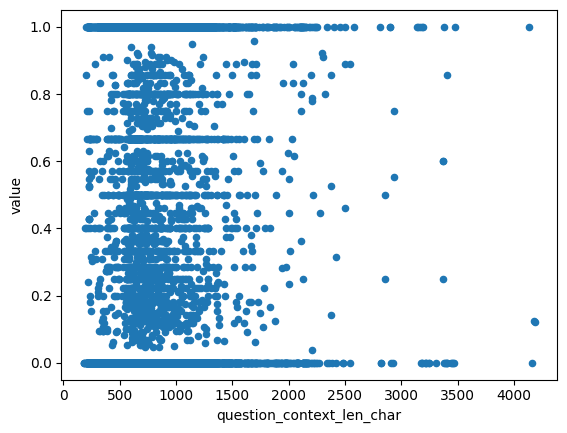

In [77]:
df_alvo = df_eval_per_question_qtd_char.query('cod_evaluation==18 and cod_metric=="F1"')
df_alvo.plot(kind='scatter',x='question_context_len_char', y='value')

In [78]:
df_alvo.corr()

,cod_evaluation,value,question_context_len_char
cod_evaluation,NaN,NaN,NaN
value,NaN,1.000000,0.015014
question_context_len_char,NaN,0.015014,1.000000


In [81]:
import seaborn as sns

<AxesSubplot:xlabel='question_context_len_char', ylabel='value'>

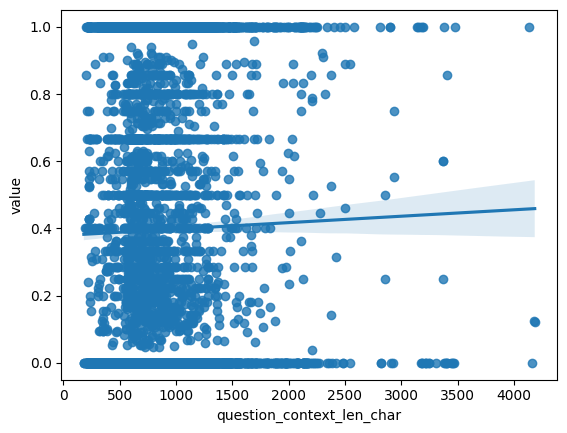

In [82]:
sns.regplot(x=df_alvo['question_context_len_char'], y=df_alvo['value'])

/home/borela/miniconda3/envs/exqa-complearning/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='question_context_len_char'>

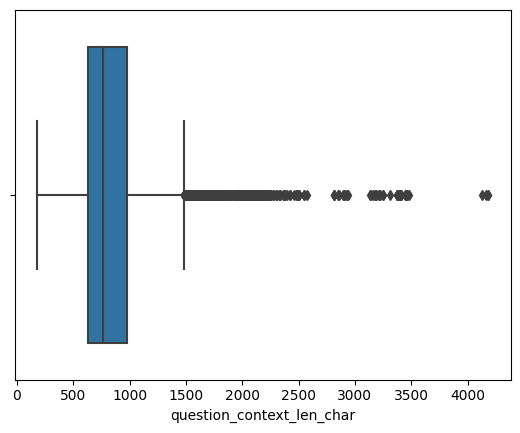

In [84]:
sns.boxplot(df_alvo['question_context_len_char'])

In [58]:
df_eval_per_question.query('cod_question=="5726c3da708984140094d0db" and cod_evaluation > 17')

,cod_evaluation,cod_question,cod_metric,value
186316,18,5726c3da708984140094d0db,EM,0.0000
186317,18,5726c3da708984140094d0db,F1,0.1250
186318,18,5726c3da708984140094d0db,EM@3,0.0000
186319,18,5726c3da708984140094d0db,F1@3,0.1250
228596,19,5726c3da708984140094d0db,EM,0.0000
228597,19,5726c3da708984140094d0db,F1,0.0000
228598,19,5726c3da708984140094d0db,EM@3,0.0000
228599,19,5726c3da708984140094d0db,F1@3,0.0000
270876,20,5726c3da708984140094d0db,EM,0.0000
270877,20,5726c3da708984140094d0db,F1,0.0000


In [52]:
df.sort_values(['context_len_char'], ascending=False)

,id,title,context,question,answer_start,answer_text,question_len_char,context_len_char,prim_pergunta,first_word_question,two_first_word_question,second_word_question
4299,5726c3da708984140094d0db,European_Union_law,"The ""freedom to provide services"" under TFEU a...",What did the Court of Justice reason were cont...,"[2318, 2318, 2318]","[narcotic drugs, narcotic drugs, narcotic drugs]",116,4063,What,What,What did,did
4298,5726c3da708984140094d0da,European_Union_law,"The ""freedom to provide services"" under TFEU a...",Why was the Dutch lawyer who moved to Belgium ...,"[369, 377, 377]",[because Dutch law said only people establishe...,121,4063,Why,Why,Why was,was
4297,5726c3da708984140094d0d9,European_Union_law,"The ""freedom to provide services"" under TFEU a...",The freedom to provide services under TFEU art...,"[64, 67, 67]","[to people who give services ""for remuneration...",69,4063,The,The,The freedom,freedom
4300,5726c3da708984140094d0dc,European_Union_law,"The ""freedom to provide services"" under TFEU a...",What did the Dutch health authorities regard a...,"[1124, 1128, 1128]","[the treatment, treatment, treatment]",101,4063,What,What,What did,did
4279,5726bc1add62a815002e8ea6,European_Union_law,The Free Movement of Workers Regulation articl...,Which articles of the Free Movement of Workers...,"[40, 40, 40]","[articles 1 to 7, articles 1 to 7, articles 1 ...",119,3341,Which,Which,Which articles,articles
...,...,...,...,...,...,...,...,...,...,...,...,...
2612,56f8ca289b226e1400dd1008,Martin_Luther,A piece of paper was later found on which Luth...,In what language was most of the statement wri...,"[102, 102, 102]","[Latin, Latin, Latin]",51,158,In,In,In what,what
1491,56e1011ecd28a01900c6740c,Nikola_Tesla,"On 7 January 1900, Tesla left Colorado Springs...",What happened to his lab?,"[65, 77, 77]","[His lab was torn down, torn down, torn down i...",25,157,What,What,What happened,happened
1493,56e1011ecd28a01900c6740e,Nikola_Tesla,"On 7 January 1900, Tesla left Colorado Springs...",What happened to the things inside the lab aft...,"[118, 118, 118]","[sold, sold, sold two years later]",66,157,What,What,What happened,happened
1492,56e1011ecd28a01900c6740d,Nikola_Tesla,"On 7 January 1900, Tesla left Colorado Springs...",When was his lab destroyed?,"[90, 90, 90]","[1904, 1904, 1904]",27,157,When,When,When was,was


In [51]:
df[df['context_len_char'] > 1000].head(10)

,id,title,context,question,answer_start,answer_text,question_len_char,context_len_char,prim_pergunta,first_word_question,two_first_word_question,second_word_question
216,56beb3a03aeaaa14008c9247,Super_Bowl_50,"The Panthers offense, which led the NFL in sco...",How many Pro Bowlers were on the Panthers offe...,"[98, 98, 98]","[six, six, six]",50,1271,How,How,How many,many
217,56beb3a03aeaaa14008c9248,Super_Bowl_50,"The Panthers offense, which led the NFL in sco...",How many total touchdowns did Cam Newton score?,"[279, 279, 279]","[45, 45, 45]",47,1271,How,How,How many,many
218,56beb3a03aeaaa14008c9249,Super_Bowl_50,"The Panthers offense, which led the NFL in sco...",How many interceptions did Cam Newton throw?,"[312, 338, 338]","[10, 10, 10]",44,1271,How,How,How many,many
219,56beb3a03aeaaa14008c924a,Super_Bowl_50,"The Panthers offense, which led the NFL in sco...",How many punts did Ted Ginn Jr. return?,"[659, 659, 659]","[27, 27, 27]",39,1271,How,How,How many,many
220,56beb3a03aeaaa14008c924b,Super_Bowl_50,"The Panthers offense, which led the NFL in sco...",Who started at tight end for the Panthers?,"[444, 444, 449]","[Greg Olsen, Greg Olsen, Olsen]",42,1271,Who,Who,Who started,started
221,56bf6b303aeaaa14008c960b,Super_Bowl_50,"The Panthers offense, which led the NFL in sco...",What is the record number of touchdowns Cam Ne...,"[279, 279, 279]","[45, 45, 45]",59,1271,What,What,What is,is
222,56bf6b303aeaaa14008c960c,Super_Bowl_50,"The Panthers offense, which led the NFL in sco...",What is the best QB ranking that Cam Newton ho...,"[396, 396, 396]","[99.4, 99.4, 99.4.]",50,1271,What,What,What is,is
223,56bf6b303aeaaa14008c960d,Super_Bowl_50,"The Panthers offense, which led the NFL in sco...",What are the most passes that Greg Olsen has had?,"[481, 481, 481]","[77 passes, 77, 77]",49,1271,What,What,What are,are
224,56bf6b303aeaaa14008c960e,Super_Bowl_50,"The Panthers offense, which led the NFL in sco...",What position does Jerricho Cotchery play?,"[419, 693, 693]","[receivers, receivers, receivers]",42,1271,What,What,What position,position
225,56bf6b303aeaaa14008c960f,Super_Bowl_50,"The Panthers offense, which led the NFL in sco...",Which Panthers RB scored 6 TDs in the 13 games...,"[964, 964, 964]","[Jonathan Stewart, Jonathan Stewart, Jonathan ...",75,1271,Which,Which,Which Panthers,Panthers


In [47]:
df['question_len_char'].describe()


count    10570.000000
mean        59.980889
std         21.155669
min         12.000000
25%         45.000000
50%         57.000000
75%         72.000000
max        197.000000
Name: question_len_char, dtype: float64

In [28]:
df['first_word_question'] = df["question"].str.split().str[0]


In [41]:
df['second_word_question'] = df["question"].str.split().str[1]

In [43]:
df['two_first_word_question'] = df['first_word_question'] + ' ' + df['second_word_question']

In [37]:
def proc(s):
    l = s.split()
    return ' '.join(l[:len(l) // 2])


In [38]:

df['two_first_word_question'] = [proc(s) for s in df['question'].values.tolist()]

In [ ]:
question_types = ["Are", "Are there", "Did", "Does", "Do", "Is", "How", "Since", "Is there", "Was", "Were", "What", "When", "Where", "Who", "Which", "Why" ]

In [46]:
df["first_word_question"].unique()

array(['Which', 'Where', 'What', 'Who', 'If', 'Super', 'The', 'How', 'At',
       'In', 'When', 'One', 'On', 'Prior', 'Before', 'Whic', 'how',
       'According', 'During', 'Peyton', 'Manning', 'Newton', 'Since',
       'Rather', 'Normally', 'Because', 'A', 'As', 'Who,', 'New',
       'Besides', 'Along', 'Paramount', 'Universal', 'Disney', 'Aside',
       'British', 'Into', 'This', 'Whose', 'Graham', 'Early', 'Over',
       'Why', "Warsaw's", 'Warsaw', 'King', 'Of', 'From', 'To', "Tesla's",
       'Were', 'Other', 'Did', 'Milutin', 'what', 'which', 'By', 'when',
       'where', 'For', 'Down', 'With', 'Is', 'Complexity', 'Assuming',
       'It', 'Turing', 'Time', 'Communication', 'Decision', 'Case',
       'Classification', 'Big', 'Difficulty', 'Concrete', 'Bounding',
       'AC', 'BQP', 'IP', 'Resources', 'Within', 'Reduction',
       'Polynomial', 'An', 'NP', 'That', 'Though', 'Problems',
       'Intractable', 'Despite', 'Name', "Teacher's", "What's",
       'Students', 'Nonverbal', '

In [44]:
df.iloc[3]

id                                                  56be4db0acb8001400a502ef
title                                                          Super_Bowl_50
context                    Super Bowl 50 was an American football game to...
question                                   Which NFL team won Super Bowl 50?
answer_start                                                 [177, 177, 177]
answer_text                 [Denver Broncos, Denver Broncos, Denver Broncos]
question_len_char                                                         33
context_len_char                                                         775
prim_pergunta                                                          Which
first_word_question                                                    Which
two_first_word_question                                            Which NFL
second_word_question                                                     NFL
Name: 3, dtype: object

In [ ]:
# criar no dataframe: 
# tipo pergunta
question_types = ["What ", "How ", "Is ", "Does ", "Do ", "Was ", "Where ", "Why ", "Which "]
self._df["question"].str.startswith(question_type)

# qtd_char_pergunta
self._df['question_len_char'] = self._df['question'].str.len()

# qtd_char_contexto
self._df['context_len_char'] = self._df['context'].str.len()

# qtd_char_menor_resposta
df_answer = self._df[['id','answer_text']].explode('answer_text')
# qtd_char_maior_resposta

# qtd_ground_truth 
self._df['qtd_ground_truth'] = self._df['answer_text'].len()

# Context

In [6]:
from source.calculation.context_learning import trata_reader_pipe

In [7]:
dict_config_model = {
                # parâmetros complementares
                "learning_method":'context',
                "num_top_k": 3,
                "num_max_answer_length":80,
                # parâmetros transfer # deixar branco
                "num_doc_stride": '',
                "num_factor_multiply_top_k": '',
                "if_handle_impossible_answer": '',
                # parâmetros context
                'list_stop_words': ['.', '\n','!'],
                'cod_prompt_format': 102.,
                'if_do_sample': False,
                "val_length_penalty":0.,
                'val_temperature': 0.1,
}


In [ ]:
name_model = "EleutherAI/gpt-j-6B"

In [10]:
model = trata_reader_pipe.Reader(name_model, dict_config_model)

Answer: number of tokens:
       answer_text
count        31168
unique       12378
top           três
freq           126


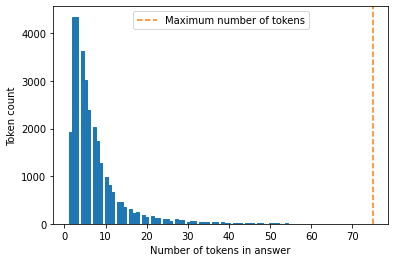

Tamanho em caracteres de answer
count    31168.00
mean        19.29
std         19.62
min          1.00
25%          7.00
50%         14.00
75%         23.00
max        198.00
Name: answer_text, dtype: object


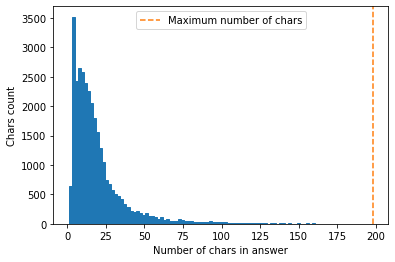

Number of tokens:
       n_tokens_question_context  n_tokens_question
count               10570.000000       10570.000000
mean                  309.847682          21.827815
std                   132.024003           8.044292
min                    60.000000           5.000000
25%                   233.000000          16.000000
50%                   285.000000          21.000000
75%                   362.000000          26.000000
max                  1602.000000          70.000000


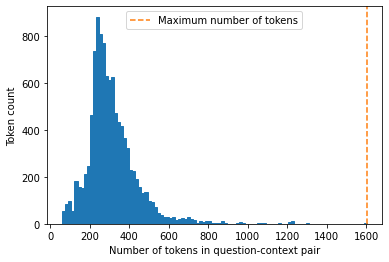

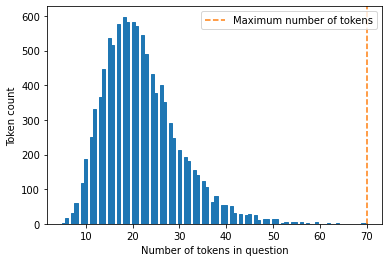

In [12]:
vdataset.print_histogram_num_tokens_given_tokenizer(parm_tokenizer=model.tokenizer)

In [8]:
name_model = "EleutherAI/gpt-neo-2.7B"
model = trata_reader_pipe.Reader(name_model, dict_config_model)

Answer: number of tokens:
       answer_text
count        34726
unique       14884
top          three
freq           123


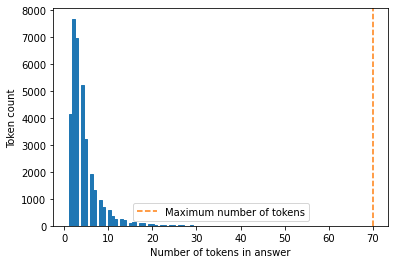

Tamanho em caracteres de answer
count    34726.00
mean        18.73
std         18.33
min          1.00
25%          7.00
50%         13.00
75%         22.00
max        160.00
Name: answer_text, dtype: object


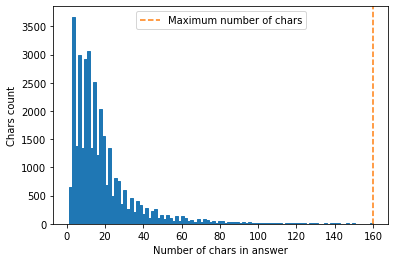

Number of tokens:
       n_tokens_question_context  n_tokens_question
count               10570.000000       10570.000000
mean                  173.366887          12.493661
std                    73.010888           4.065530
min                    37.000000           4.000000
25%                   129.000000          10.000000
50%                   159.000000          12.000000
75%                   203.000000          15.000000
max                   810.000000          40.000000


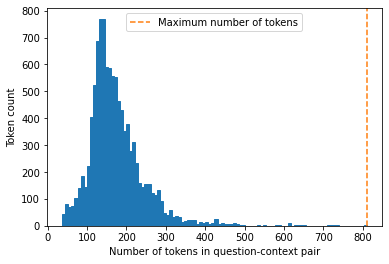

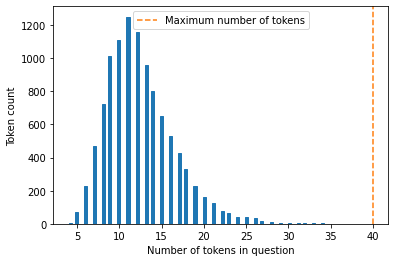

In [13]:
vdataset.print_histogram_num_tokens_given_tokenizer(parm_tokenizer=model.tokenizer)

# Transfer

In [ ]:
from source.calculation.transfer_learning.trata_reader import Reader

In [8]:

if vdataset._language == 'en':
    name_model = 'distilbert-base-cased-distilled-squad'
    path_model = "models/transfer_learning/"+name_model
    model = Reader(pretrained_model_name_or_path=path_model, parm_dict_config=None)
else:
    name_model = 'pierreguillou/bert-large-cased-squad-v1.1-portuguese'
    path_model = "models/transfer_learning/"+name_model
    model = Reader(pretrained_model_name_or_path=path_model, parm_dict_config=None)




Answer: number of tokens:
       answer_text
count        34726
unique       14884
top          three
freq           123


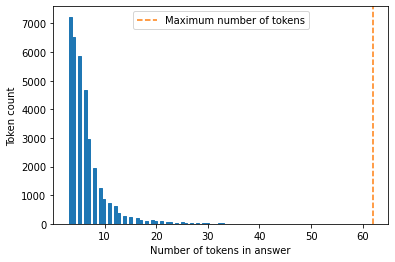

Tamanho em caracteres de answer
count    34726.00
mean        18.73
std         18.33
min          1.00
25%          7.00
50%         13.00
75%         22.00
max        160.00
Name: answer_text, dtype: object


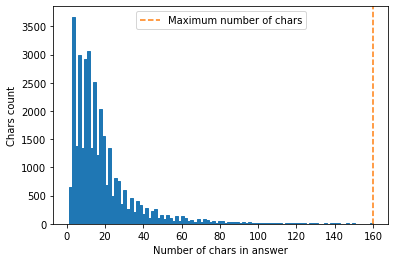

Number of tokens:
       n_tokens_question_context  n_tokens_question
count               10570.000000       10570.000000
mean                  181.640965          14.867077
std                    75.466542           4.210699
min                    42.000000           6.000000
25%                   136.000000          12.000000
50%                   167.000000          14.000000
75%                   211.000000          17.000000
max                   833.000000          44.000000


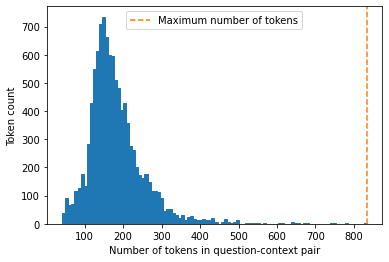

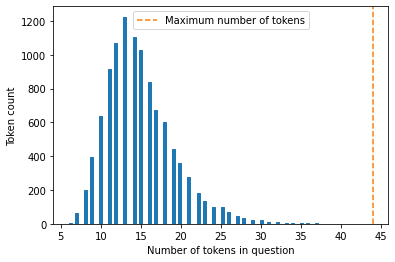

In [56]:
vdataset.print_histogram_num_tokens_given_tokenizer(parm_tokenizer=model.tokenizer)


In [32]:
df = vdataset.df[['answer_text']].explode('answer_text')

In [33]:
type(df_answer)

pandas.core.frame.DataFrame

In [34]:
df_answer.iloc[0]

answer_text    Denver Broncos
Name: 0, dtype: object

In [30]:
df_answer2 = df_answer.explode('answer_text')

In [31]:
df_answer2.iloc[0]

answer_text    Denver Broncos
Name: 0, dtype: object

In [29]:
len(df_answer2)

1

Number of tokens:
       n_tokens_question_context  n_tokens_question
count               10570.000000       10570.000000
mean                  181.640965          14.867077
std                    75.466542           4.210699
min                    42.000000           6.000000
25%                   136.000000          12.000000
50%                   167.000000          14.000000
75%                   211.000000          17.000000
max                   833.000000          44.000000


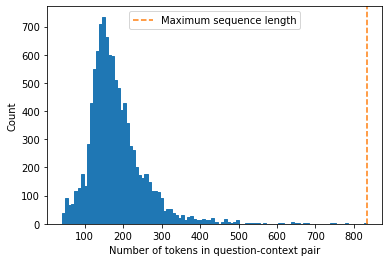

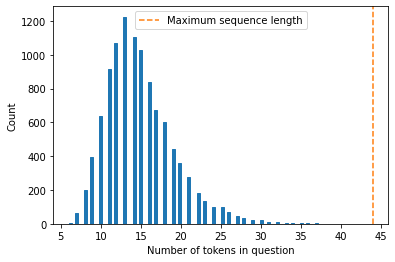

In [26]:
vdataset.print_histogram_num_tokens_given_tokenizer(parm_tokenizer=model.tokenizer)

In [28]:
vdataset =squad_related.load_squad_dataset_1_1('pt')

Using custom data configuration default-61eba6f0d4a86c5d
Reusing dataset json (/home/borela/.cache/huggingface/datasets/json/default-61eba6f0d4a86c5d/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5)
100%|██████████| 1/1 [00:00<00:00, 546.77it/s]


In [31]:
if vdataset._language == 'en':
    name_model = 'distilbert-base-cased-distilled-squad'
    path_model = "models/transfer_learning/"+name_model
    model = Reader(pretrained_model_name_or_path=path_model, parm_dict_config=None)
else:
    name_model = 'pierreguillou/bert-large-cased-squad-v1.1-portuguese'
    path_model = "models/transfer_learning/"+name_model
    model = Reader(pretrained_model_name_or_path=path_model, parm_dict_config=None)

Number of tokens:
       n_tokens_question_context  n_tokens_question
count               10570.000000       10570.000000
mean                  196.044655          15.734248
std                    81.047200           4.541214
min                    44.000000           6.000000
25%                   147.000000          12.000000
50%                   180.000000          15.000000
75%                   228.000000          18.000000
max                   950.000000          46.000000


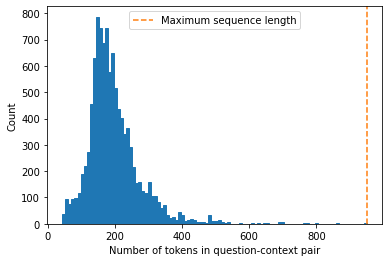

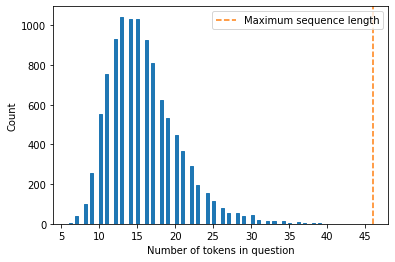

In [33]:
vdataset.print_histogram_num_tokens_given_tokenizer(parm_tokenizer=model.tokenizer)

In [10]:
vdataset.dataset[0]

{'id': '56be4db0acb8001400a502ec',
 'title': 'Super_Bowl_50',
 'context': 'Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi\'s Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.',
 'question': 'Which NFL team represented the AFC at Super Bowl 50?',
 'answer_start': [177, 177, 177],
 'answer_text': ['Denver Broncos', 'Denver 

What : 4725
What is beta carotene?
What type of T cells help with both innnate and adaptive immunity?
How : 1087
How fast were the winds around St. Augustine in the 1964 hurricane?
How many interceptions did Josh Norman score touchdowns with in 2015?
Is : 10
Is the packet header long
Is the output of a functional problem typically characterized by a simple or complex answer?
Does : 4
Does BSkyB carry any control over the picture quality of a channel?
Does the residential architecture of the Tower District compare or contrast with other part of Fresno?
Do : 2
Do adults or juveniles secretions luminesce brighter?
Do the U.S. flags on the moon still have their original coloring or were they faded due to the Sun?
Was : 10
Was was the plan for Langlades mission?
Was the testing of the LM during Apollo 5 a failure or a success?
Where : 431
Where was Montcalm focusing the defense for New France?
Where did he work on the oscillators?
Why : 150
Why would a person chose civil disobedience agains

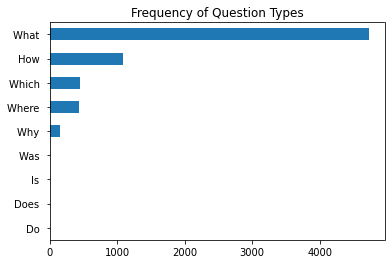

In [11]:
dataset_en.print_total_per_question_type()

In [18]:
dataset_en.dataset[0]['question']


'Which NFL team represented the AFC at Super Bowl 50?'

In [20]:
dataset_en.dataset[2]['question']

'Where did Super Bowl 50 take place?'

In [14]:
dataset_en.print_example()

Dataset dev-v1.1.json 
#artigos: 48

****** artigo ****** 
  dict_keys(['title', 'paragraphs']) 
  1o artigo 
    #paragrafos 54;
    Artigo:
      Super_Bowl_50, 

    ****** paragrafo ******
      dict_keys(['context', 'qas']) 
      1o paragrafo: 
      #perguntas: 30 
      Parágrafo: 
        Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bo

In [48]:
dataset_en.df.head()

,id,title,context,question,answer_start,answer_text
0,56be4db0acb8001400a502ec,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team represented the AFC at Super Bo...,"[177, 177, 177]","[Denver Broncos, Denver Broncos, Denver Broncos]"
1,56be4db0acb8001400a502ed,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team represented the NFC at Super Bo...,"[249, 249, 249]","[Carolina Panthers, Carolina Panthers, Carolin..."
2,56be4db0acb8001400a502ee,Super_Bowl_50,Super Bowl 50 was an American football game to...,Where did Super Bowl 50 take place?,"[403, 355, 355]","[Santa Clara, California, Levi's Stadium, Levi..."
3,56be4db0acb8001400a502ef,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team won Super Bowl 50?,"[177, 177, 177]","[Denver Broncos, Denver Broncos, Denver Broncos]"
4,56be4db0acb8001400a502f0,Super_Bowl_50,Super Bowl 50 was an American football game to...,What color was used to emphasize the 50th anni...,"[488, 488, 521]","[gold, gold, gold]"


In [26]:
dataset_en.df.describe()

,id,title,context,question,answer_start,answer_text
count,10570,10570,10570,10570,10570,10570
unique,10570,48,2067,10533,5800,9543
top,56be4db0acb8001400a502ec,Super_Bowl_50,Super Bowl 50 was an American football game to...,What shape are granal thylakoids?,"[0, 0, 0]","[two, two, two]"
freq,1,810,30,2,130,22


In [33]:
dataset_en =squad_related.carregar_squad_1_1('en')
columns = ['context', 'question']
for column in columns:
    s = dataset_en.df[column].str.len()
    print(f"Tamanho de {column}")
    print(s.describe().apply("{0:.2f}".format))

Tamanho de context
count    10570.00
mean       778.98
std        350.70
min        157.00
25%        574.00
50%        703.00
75%        914.00
max       4063.00
Name: context, dtype: object
Tamanho de question
count    10570.00
mean        59.98
std         21.16
min         12.00
25%         45.00
50%         57.00
75%         72.00
max        197.00
Name: question, dtype: object


In [23]:
dt = dataset_en.dataset

In [30]:
dt.column_names

['id', 'title', 'context', 'question', 'answer_start', 'answer_text']